# Support Vector Machine (SVM)

The package Scikit-learn is used, starting out with a toy binary classification example, then addressing a more difficult one. 


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%load_ext autoreload
%autoreload 2

# 1 Support Vector Machine (SVM)
SVM tries to solve linear classification problem of the **primal form**:  
    \begin{align}
        \underset{\tilde{\mathbf{w}},w_0}{\operatorname{min}}  \ \ & \frac{1}{2}\|\tilde{\mathbf{w}}\|^2 + C \sum^N_{i=1}\zeta_i \\
        \operatorname{subject \  to} \ \ &  y_i(\tilde{\mathbf{w}}^T\mathbf{x_i}+w_0) \geq 1-\zeta_i , \forall \  i \\
                          &  \zeta_i \geq 0 , \forall \  i
    \end{align}
where, $\tilde{\mathbf{w}}$,$w_0$ are weight and bias. C is penalty term, $\zeta_n$ is error in terms of how far data point is beyond correct margin and $y_i \in\{-1,1\}$ for binary classification. $\|\tilde{\mathbf{w}}\|$ is inversely related to margin width, so minimizing it means maximizing the margin, hence we minimize $\|\tilde{\mathbf{w}}\|$. As our data may not be linearly separable, hence maximizing margin will lead to some misclassifications. $\zeta_i$ is greater than zero when a data point is beyond margin and how many such data points are allowed is controlled by C. We can choose the right value for C, given the data, through applying cross-validation methods. Hence with this objective function we get a maximum margin with certain amount of misclassification.

The corresponding **dual problem** is given by:
\begin{align}
    \underset{\{\alpha_i\}}{\operatorname{max}} \ \ 
    & \sum_{i=1}^N \alpha_i - \frac 1 2 \sum_{i=1}^N\sum_{j=1}^N \alpha_i\alpha_jy_iy_j\mathbf{x}_i^T\mathbf{x}_j  \\   
    \operatorname{subject \ to} & \ \ \sum_{i=1}^N \alpha_iy_i = 0 \\
                 & \ \ 0 \leq \alpha_i \leq C, \forall i \ \ 
\end{align}

   *  We can now express $\tilde{\mathbf{w}}$ using $\alpha_i$s as $\tilde{\mathbf{w}} = \sum_{i=1}^N \alpha_iy_i\mathbf{x_i} $
   *  Thus, we can plugg this expression of $\tilde{\mathbf{w}}$ in $y(\mathbf{x})$ as, 
     \begin{align}
       \hat{y}(\mathbf{x}) &= \tilde{\mathbf{w}}^T\mathbf{x} + w_0 \\
                           &= \sum_{i=1}^N \alpha_iy_i\mathbf{x}_i^T\mathbf{x} + w_0
     \end{align}
   * Furthermore, the sum can be computed using only the set of support vectors ($\delta$), as the others will have no effect 
       \begin{align}
       \hat{y}(\mathbf{x}) & = \sum_{i \in \delta} \alpha_iy_i\mathbf{x}_i^T\mathbf{x} + w_0
     \end{align}


# 2 Binary Classification

Let's begin with a simple **binary** classification using Linear SVM.
The data is simplely **linear** separable.

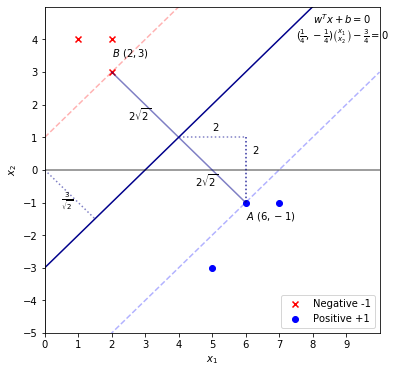

In [2]:
# Simple data
from plots import plot_simple_data
x = np.array([[2,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])
plot_simple_data()

### 2.1 Linear SVM
Using SVC, an SVM classifier is built and compared to the scikit learn model.

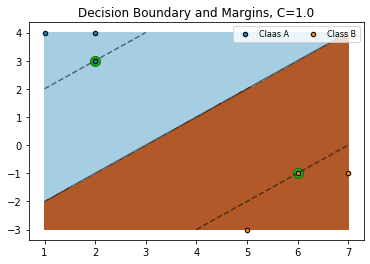

w =  [[ 0.25 -0.25]]
w0 =  [-0.75]
Number of support vectors for each class =  [1 1]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Indices of support vectors =  [2 3]
a (Coefficients of the support vector in the decision function) =  [[-0.0625  0.0625]]


In [3]:
from sklearn.svm import SVC
from plots import plot

# 1. Declare a SVC with C=1.0 and kernel='linear'
clf = SVC(C=1.0, kernel = "linear")

# 2. use x and y to fit the model
clf.fit(x,y) 

# 3. show the fitted model
plot(x, y, clf)

print('w = ',clf.coef_)
print('w0 = ',clf.intercept_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Support vectors = ', clf.support_vectors_)
print('Indices of support vectors = ', clf.support_)
print('a (Coefficients of the support vector in the decision function) = ', clf.dual_coef_)

In [4]:
# Use the weights (w) from the fitted model to predict the labels of input data points

def raw_predict(x, w, w0):
    '''
    given input data, w and w0, output the prediction result
    
    input:
    x: data, np.array of shape (N, D) where N is the number of datapoints and D is the dimension of features.
    w: weights, np.array of shape (N,)
    w0: bias, np.array of shape (1,)
    
    output:
    out: predictions, np.array of shape (N, ). tip: .astype(int) 
    '''    
    N=x.shape[0]
    out = np.zeros((N,),dtype=np.int8)
    for i in range(N):
            if w@x[i]+w0 > 0:
                out[i] = 1
            else:
                out[i] = -1
    
    res = np.squeeze(w@x.T+w0)
    
    return res/(np.abs(res))

x_test = np.array([
    [4, 2],
    [6, -3],
    [4, 10],
    [10, -10],
    [-2, -2]])


#output the predictions on x_test
w=clf.coef_
w0=clf.intercept_
raw_pred = raw_predict(x_test, w, w0)

print("Prediction from the model: ", clf.predict(x_test))
print("Prediction from your implementation: ", raw_pred)
assert(raw_pred.all() == clf.predict(x_test).all())



Prediction from the model:  [-1  1 -1  1 -1]
Prediction from your implementation:  [-1.  1. -1.  1. -1.]


In [6]:
# Finds out the indices of support vectors by using w and w0
desicion_function_from_model = clf.decision_function(x) # this function outputs the results of wx+w0

## Calculates the decision function manually
decision_function = np.squeeze(w@x.T+w0)

assert(desicion_function_from_model.all() == decision_function.all())

## according to the condition that support vectors should satisfy

support_vector_indices = np.squeeze(np.where(np.abs(decision_function)==1))
print('I find the indices of support vectors = ', support_vector_indices)
assert(support_vector_indices.all() == clf.support_.all())


x = np.array([[2,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )

I find the indices of support vectors =  [2 3]


### 2.2 Dual Coefficients VS Primal Coefficients

By using `dual_coef_` attribute of the model, we can get the dual coefficients $\alpha_i$ of the support vectors.

**Answer** Dual coefficients $a_n$ must satisfy constraint $0\leq \alpha_i \leq C$.  
Support vector which lies on margin has $\alpha_i<C$ and ones between margins have $a_i=C$

Scikit return coefficients with label of the class {-1,1}, i.e. it returns $a_iy_i$, where $y_i \in \{1,-1\}$. Also, the coefficients returned are only those of support vectors.

Given support vectors ($\delta$) and their dual_coefficients, the weights can be computed by:
\begin{align}
\tilde{\mathbf{w}} & = \sum_{i \in \delta}^N \alpha_iy_i\mathbf{x_i} 
\end{align}


In [8]:
# Compute primal coefficients given dual coefficients and support vectors

def compute_w(dual_coef, support_vectors):
    '''
    given dual coefficients and support_vectors, compute the primal coefficients
    
    input:
    dual_coef: dual coefficients, np.array of shape (1, n) where n is the number of support vectors.
    support_vectors: np.array of shape (n, D) where n is the number of support vectors and D is the dimension of features.
    w0: bias, np.array of shape (1,)
    
    output:
    w: primal coefficients, np.array of shape (D, )
    '''
    w=np.sum(dual_coef@support_vectors,axis=0)

    return w


w = compute_w(clf.dual_coef_, clf.support_vectors_)

print("Primal coefficients from the model: ", clf.coef_[0])
print("Primal coefficients from your implementation: ", w)

assert(w.all() == clf.coef_[0].all())



Primal coefficients from the model:  [ 0.25 -0.25]
Primal coefficients from your implementation:  [ 0.25 -0.25]


### 2.3 Different C values
Let's try different values of C. In the code, vary the C value from 0.001 to 100 and notice the changes on a bigger dataset.  

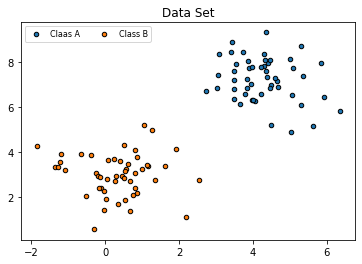

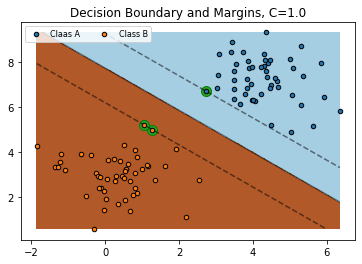

In [9]:
from sklearn.svm import SVC
from helpers import get_simple_dataset
from plots import plot

# Get the simple dataset
X, Y = get_simple_dataset()
plot(X,Y,None,dataOnly=True)

#Declare a SVM model with linear kernel and C=1.0
clf = SVC(kernel='linear', C=1.0)

#call the fit method
clf.fit(X, Y)

#plot the decision boundary
plot(X, Y, clf)


The above plot shows the decision boundary and margins of the learnt model. Encircled points are the support vectors.  

When C=  1e-05  w=  [[-0.00197441 -0.00210907]]
When C=  1.4563484775012445e-05  w=  [[-0.00287542 -0.00307154]]
When C=  2.1209508879201926e-05  w=  [[-0.00418762 -0.00447323]]
When C=  3.0888435964774785e-05  w=  [[-0.00609863 -0.00651459]]
When C=  4.498432668969444e-05  w=  [[-0.00888173 -0.00948751]]
When C=  6.55128556859551e-05  w=  [[-0.0129349  -0.01381712]]
When C=  9.540954763499944e-05  w=  [[-0.01883772 -0.02012254]]
When C=  0.00013894954943731373  w=  [[-0.02743428 -0.02930544]]
When C=  0.00020235896477251554  w=  [[-0.03995387 -0.04267893]]
When C=  0.00029470517025518097  w=  [[-0.05818676 -0.06215539]]


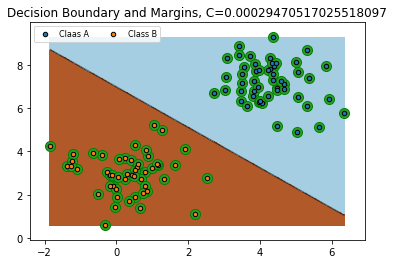

When C=  0.00042919342601287783  w=  [[-0.08474021 -0.09051991]]
When C=  0.0006250551925273969  w=  [[-0.12341127 -0.13182853]]
When C=  0.0009102981779915217  w=  [[-0.16484145 -0.17200768]]
When C=  0.0013257113655901081  w=  [[-0.19341156 -0.20016964]]
When C=  0.0019306977288832496  w=  [[-0.21071107 -0.2249489 ]]
When C=  0.002811768697974228  w=  [[-0.2342133  -0.23847435]]
When C=  0.004094915062380423  w=  [[-0.25066824 -0.24826308]]
When C=  0.005963623316594642  w=  [[-0.28697053 -0.27453561]]
When C=  0.00868511373751352  w=  [[-0.29465688 -0.30451329]]
When C=  0.012648552168552958  w=  [[-0.34179641 -0.31265912]]


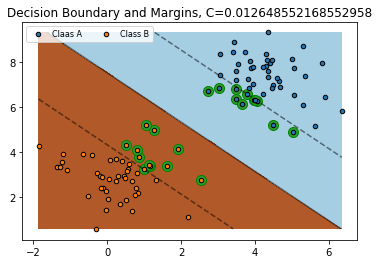

When C=  0.018420699693267144  w=  [[-0.37181611 -0.32247166]]
When C=  0.026826957952797246  w=  [[-0.38840559 -0.33928214]]
When C=  0.039069399370546126  w=  [[-0.39347969 -0.40471245]]
When C=  0.05689866029018293  w=  [[-0.43168541 -0.41298938]]
When C=  0.08286427728546843  w=  [[-0.49319431 -0.43016213]]
When C=  0.1206792640639329  w=  [[-0.57274912 -0.49914445]]
When C=  0.17575106248547895  w=  [[-0.59122145 -0.50183158]]
When C=  0.2559547922699533  w=  [[-0.58706836 -0.51349549]]
When C=  0.3727593720314938  w=  [[-0.58574174 -0.62882759]]
When C=  0.5428675439323859  w=  [[-0.61031424 -0.65229554]]


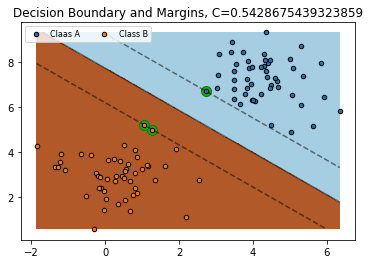

When C=  0.7906043210907685  w=  [[-0.61031424 -0.65229554]]
When C=  1.1513953993264456  w=  [[-0.61031424 -0.65229554]]
When C=  1.6768329368110066  w=  [[-0.61031424 -0.65229554]]
When C=  2.44205309454865  w=  [[-0.61031424 -0.65229554]]
When C=  3.5564803062231287  w=  [[-0.61031424 -0.65229554]]
When C=  5.179474679231202  w=  [[-0.61031424 -0.65229554]]
When C=  7.543120063354607  w=  [[-0.61031424 -0.65229554]]
When C=  10.985411419875572  w=  [[-0.61031424 -0.65229554]]
When C=  15.998587196060573  w=  [[-0.61031424 -0.65229554]]
When C=  23.29951810515367  w=  [[-0.61031424 -0.65229554]]


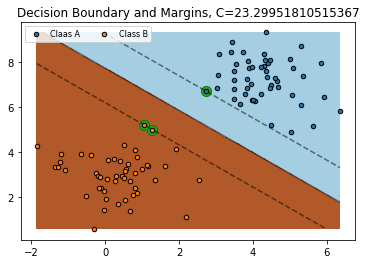

When C=  33.932217718953225  w=  [[-0.61031424 -0.65229554]]
When C=  49.41713361323828  w=  [[-0.61031424 -0.65229554]]
When C=  71.96856730011514  w=  [[-0.61031424 -0.65229554]]
When C=  104.81131341546853  w=  [[-0.61031424 -0.65229554]]
When C=  152.64179671752302  w=  [[-0.61031424 -0.65229554]]
When C=  222.2996482526191  w=  [[-0.61031424 -0.65229554]]
When C=  323.745754281764  w=  [[-0.61031424 -0.65229554]]
When C=  471.486636345739  w=  [[-0.61031424 -0.65229554]]
When C=  686.6488450042998  w=  [[-0.61031424 -0.65229554]]
When C=  1000.0  w=  [[-0.61031424 -0.65229554]]


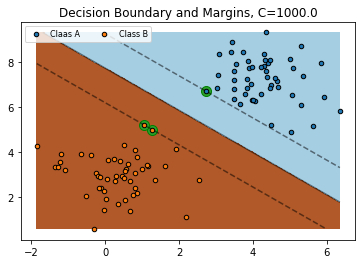

In [10]:
# Varys C and plots the boundaries
C_list = np.logspace(-5,3)

for it, C in enumerate(C_list):
    clf = SVC(kernel="linear", C=C)
    clf.fit(X,Y)
    print("When C= ", C, " w= ", clf.coef_)
    if (it+1)%10 == 0:
        plot(X,Y,clf)
    


This visualizes that the lower the value of C, the more misclassification is allowed, meaning a larger margin and vice versa.